Importujemy niezbędne biblioteki:

In [1]:
import math
import numpy as np
import pygad

Definiujemy funkcję do zoptymalizowania:

In [2]:
def endurance(x, y, z, u, v, w):
    """Funkcja do zoptymalizowania, podana przez eksperta z (danej) dziedziny"""
    return math.exp(-2 * (y - math.sin(x)) ** 2) + math.sin(z * u) + math.cos(v * w)

Definujemy funkcję fitnessu:

In [3]:
"""Kroki są oddzielne, ponieważ:
1. Technikalia związane z implementacją gen. alg. w PyGAD
2. (Opcjonalne) Być może wygodniej jest rozdzielić sposób ewaluacji od obiektu, na którym docelowo pracujemy/optymalizujemy go.
"""
def fitness_function(genetic_algorithm_instance, chromosome, chromosome_idx):
    x = chromosome[0]
    y = chromosome[1]
    z = chromosome[2]
    u = chromosome[3]
    v = chromosome[4]
    w = chromosome[5]
    
    fitness_value = endurance(x=x, y=y, z=z, u=u, w=w, v=v)
    
    return fitness_value

Inicjujemy algorytm genetyczny:

In [7]:
ga_instance = pygad.GA(
    gene_space=np.linspace(start=0, stop=1, num=100000),
    num_generations=70,
    num_parents_mating=9,
    fitness_func=fitness_function,
    sol_per_pop=18,
    num_genes=6,
    parent_selection_type='tournament',
    mutation_type='random',
    mutation_probability=float(1/6),
    stop_criteria=['reach_2.83', 'saturate_15']
)

Uruchamiamy algorytm i analizujemy wyniki:

In [8]:
ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
generations_number = ga_instance.best_solution_generation

print(f"Ilości metali do użycia w stopie (parametry rozwiązania): {solution}")
print(f"Wytrzymałość stopu (wart. funkcji 'endurance'): {solution_fitness}")
print(f"Nr generacji/pokolenia najlepszego rozwiązania: {generations_number}")

Ilości metali do użycia w stopie (parametry rozwiązania): [0.89480895 0.71546715 0.99725997 0.99645996 0.00744007 0.99909999]
Wytrzymałość stopu (wart. funkcji 'endurance'): 2.8297216171334822
Nr generacji/pokolenia najlepszego rozwiązania: 46


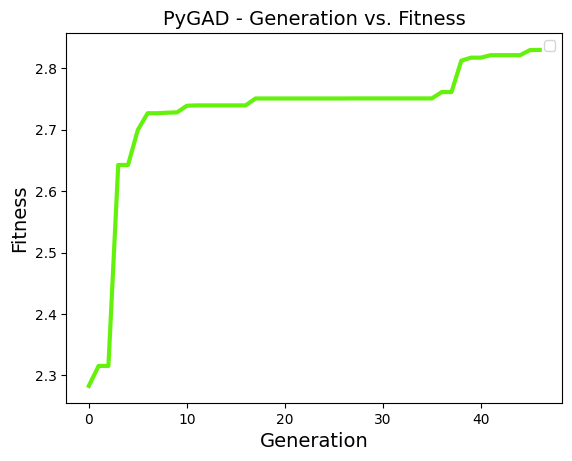

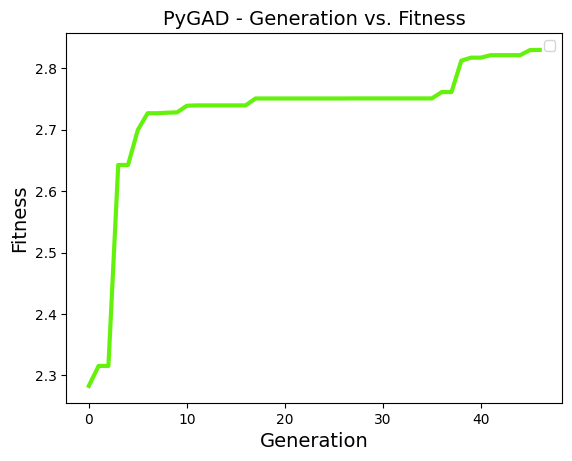

In [9]:
ga_instance.plot_fitness()